# Matt Manner [xkv3na@virginia.edu]
## DS 5001
### 3 Apr 23

# 1) INTRODUCTION

I decided to examine a collection of works by William Shakespeare. I am fascinated by Shakespeare, and he is considered by many to be the greatest writer in history. He is an interesting figure, and some believe that his plays were actually written by a man named Edward de Vere. [See here for more.](https://www.thoughtco.com/who-was-edward-de-vere-2984933)

I have asked many questions of the Shakespeare data- I want to analyze Shakespeare's unique vocabulary, find which plays, acts, scenes, and words are most significant, compare similarity of his works, generate topic models for each work, and visualize results.

Using Shakespeare for this project brought certain challenges- the somewhat esoteric vocabulary particularly limits the ability of tools like sentiment analysis, as most word/sentiment mapping datasets are based on more modern vocab. In addition, some of Shakespeare's sentence structures are essentially unrecognizable to a contemporary person (for example, imagine someone in the middle of UVA campus asking a student "wherefore art thou?"... they'd probably be referred to a psychiatric ward.

I greatly enjoyed this endeavor. I was greatly assisted by Professor Alvarado's code notebooks. I also referenced numerous study materials online, to learn more about these concepts. By far the analytical technique that is most interesting to me is word embeddings. 

# 2) SOURCE DATA

Provenance: I retrieved the corpus from [Project Gutenberg] (https://www.gutenberg.org/ebooks/100) (side note: Shakespeare has many more plays than I realized). 

Location: LINK HERE TO UVA BOX

Description: There are 44 works in the corpus, not all of which are full length plays (some are poems). I did not use all the works, as certain works were encoded in a different format (be it different OHCO, different regex, or simply a different type of work, e.g. play vs. poem). Of the plays I did use, the average length in words was 24259. Interestingly, every one of Shakespeare's plays is 5 acts long, which I was not previously aware of. The number of scenes varies widely by work. Section 2.2, Initial Exploratory Data Analysis, contains some basic visualizations of play length. 

Format: I downloaded the data as a .txt file for (relatively) easy analysis. All the plays I analyzed were in the OHCO format of play title, act number, scene number, sentence. As all the works I examined are plays, almost the entire corpus consists of dialogue, and there are no "paragraphs" in the OHCO. 

# 3) DATA MODEL

Outputs of my code are:

(INSERT LINK TO UVA BOX) LIB; basically a simple list of works- as there is only one author in the corpus, I did not need to include other fields besides title in this table. Metadata for the corpus.

CORPUS; LINK a list of tokens, organized by OHCO (so each token fits under a book ID, act number, scene number, sentence number, and token number. Each token has an assigned part of speech. This table was parsed by NLTK.

VOCAB; LINK a bag of unique words across the set of works, organized by use in descending order. Each word is encoded as a row, and fields for each row include: number of times used, frequency of times used, perplexity, length of word, most likely part of speech, word stem from three different stemmers, whether the word is a stop word, and all TFIDF values.

PAIRS; LINK a list of each work compared to each other work by similarity. This data is also visualized in dendrograms in the notebook.

TOPICS_plays; LINK a matrix of each work and each topic, which shows each play's association with a given topic. 

LOADINGS; LINK a list of 1000 terms (limited to 1000 in the interest of reducing computational cost) that maps words and their relationship to principal components.

EMBEDDINGS; a table of terms with associated emotions.

# 4) Without further ado... EXPLORATION

INITIAL DATA ACQUISITION AND CLEANING: I began by importing packages, and then the raw text file for the corpus. Project Gutenberg e-books contain both a header and footer, which needed to be removed. From there, I selected a subset of Shakespeare's most famous plays, like Romeo and Juliet, Macbeth, and Othello. I partitioned the raw text file, which contained all the works consecutively, into a separate Pandas dataframe each individual play for ease of parsing, which had to be done according to Shakespeare's relatively consistent OHCO (play title, act number, scene number, line number). After parsing each individual play, I recombined them into a single dataframe.

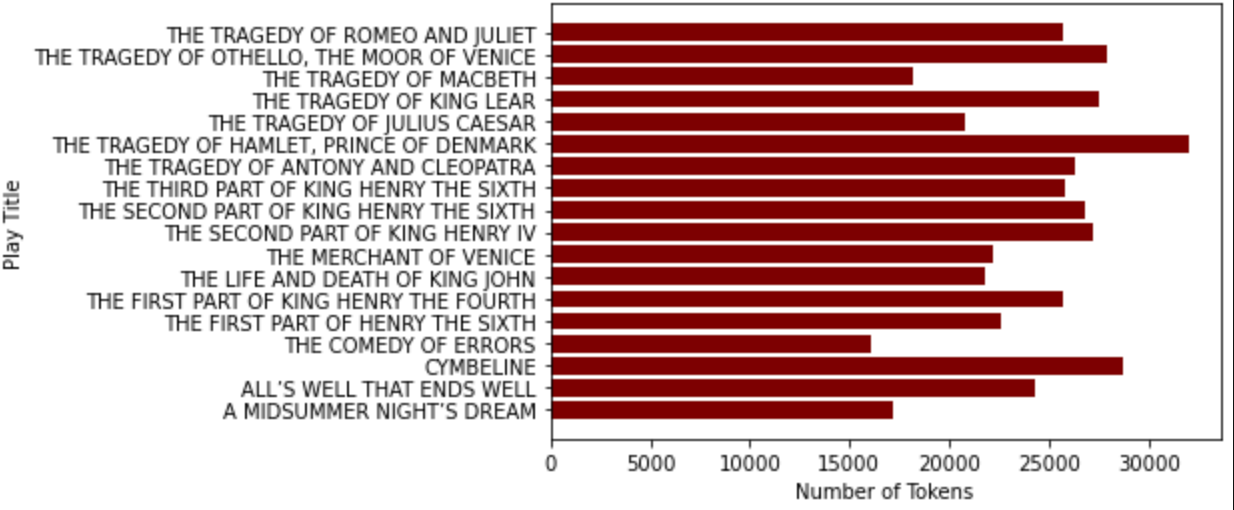

In [11]:
from IPython.display import Image
Image("/Users/mattmanner/Desktop/Screenshot 2023-04-04 at 6.20.09 AM.png",width=700, height=700)

The above shows the plays by length in tokens (words). 

I used the Natural Language Toolkit package to parse the works into TOKENS (a list of words organized by OHCO, so each spot in the play had a "coordinate" pointing to it) and VOCAB (an unordered bag of unique tokens).

Next analytical effort was TFIDF.

#### TFIDF

I visualized the top 20 terms by several different TFIDF methods. Interestingly (and unsurprisingly), nouns, particularly names, dominated TFIDF. This makes sense since TFIDF is calculated by multiplying a word's frequency within a document times the inverse frequency of the word across documents. Since names like Hamlet/Othello/Iago, etc. are likely to appear a large number of times in their respective plays but not at all in others, they will rank highly in TFIDF. (Note: I attempted to exclude proper nouns from the TFIDF analysis, but NLTK's part-of-speech processor did not correctly classify a great deal of nouns- names still dominated as they were not correctly classed as proper nouns by NLTK).

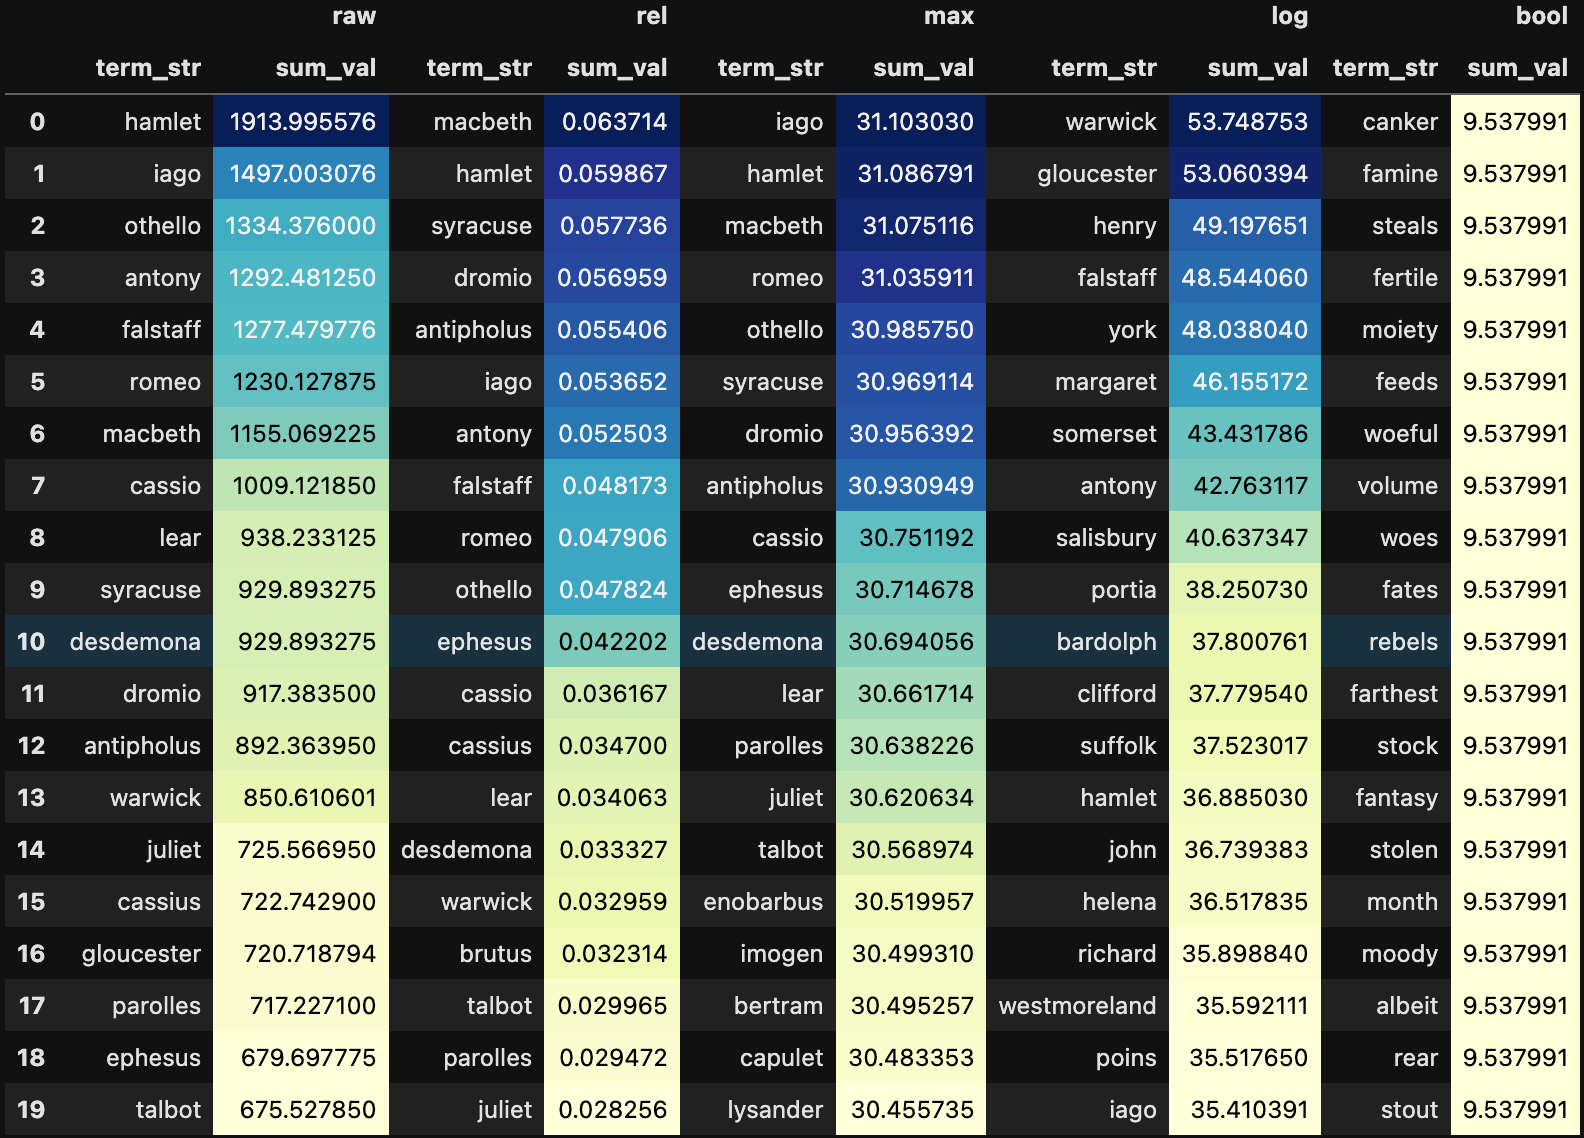

In [13]:
Image("/Users/mattmanner/Desktop/Screenshot 2023-04-04 at 6.27.49 AM.png",width=700, height=700)

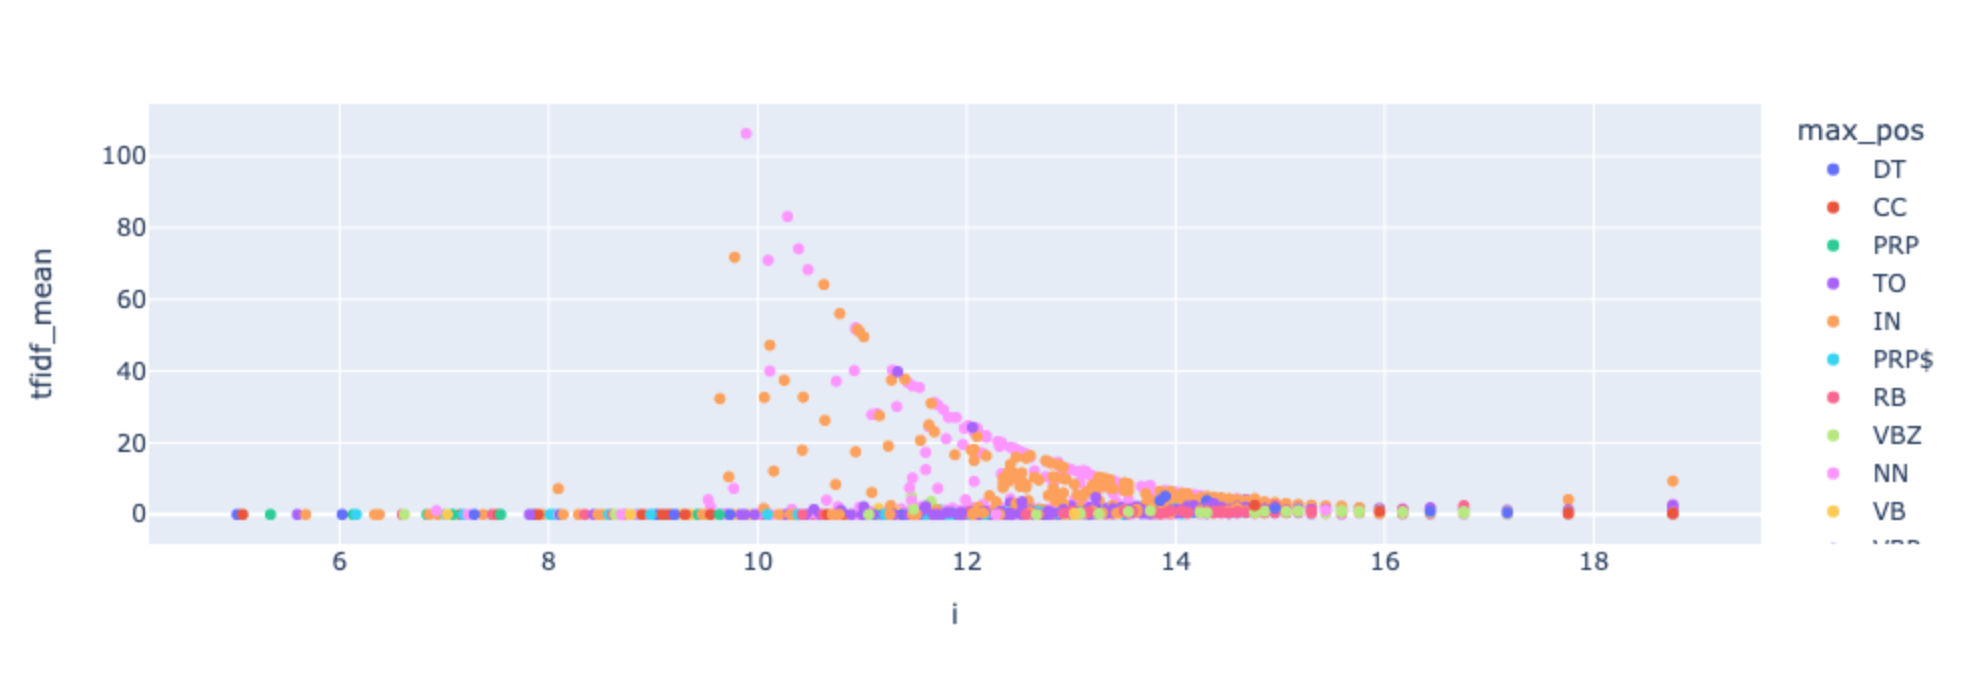

In [14]:
Image("/Users/mattmanner/Desktop/Screenshot 2023-04-04 at 6.30.18 AM.png",width=700, height=700)

The above scatterplot is another visualization of the TFIDF, and it is dominated by nouns (orange dots). The x-axis shows perplexity, which is analogous to a token's probability. 

The following dendrogram is a visual representation of the similarity of plays based on the Jensen-Shannon metric, a common similarity metric that incorporates information theory. 
Note the multi-part plays, like the King Henry IV or VI plays- they are clustered close together, which is logical and intuitive.

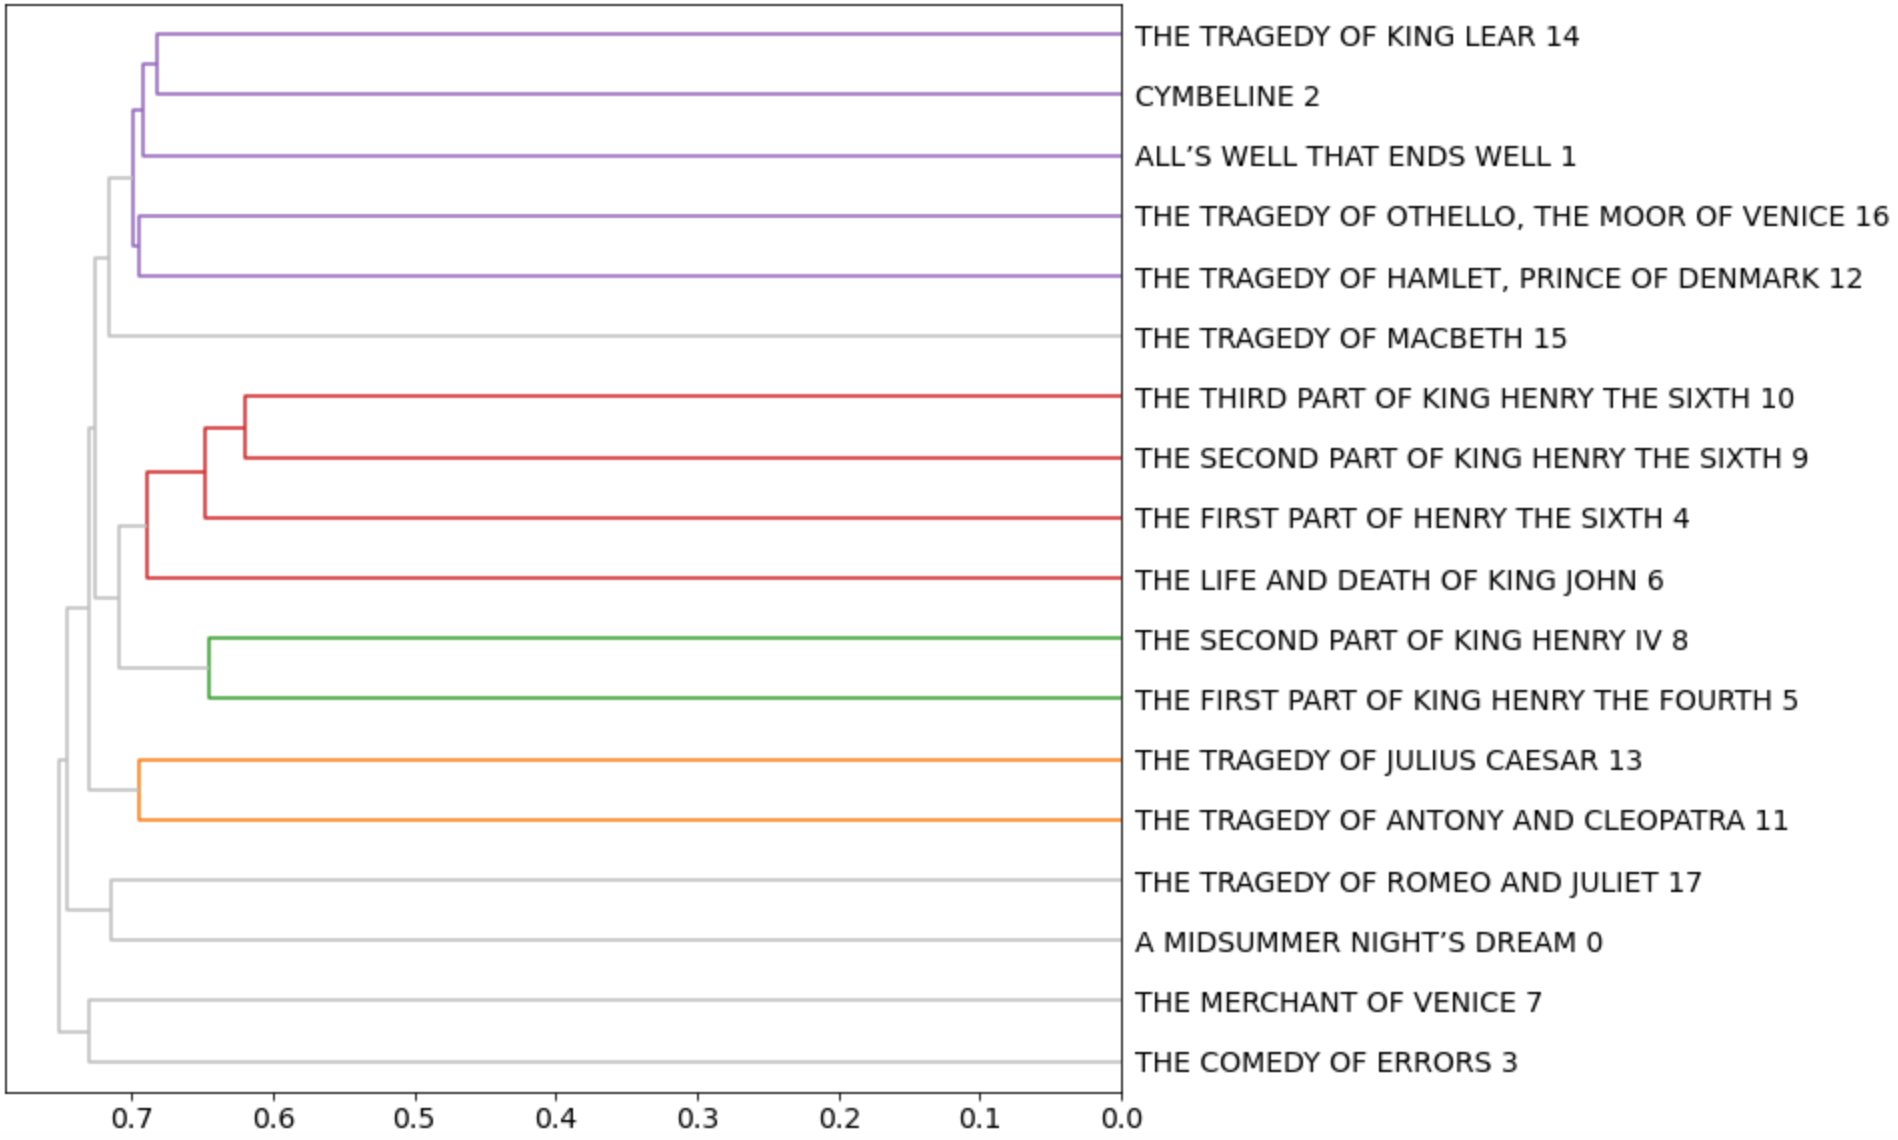

In [16]:
Image("/Users/mattmanner/Desktop/Screenshot 2023-04-04 at 6.32.36 AM.png",width=700, height=700)

#### Principal Component Analysis 

Principal component analysis is a method of reducing matrix dimensionality by combining features, recreating the matrix among features that contribute most to variance. This projection and dimension reduction allows us to capture the most informative features. 

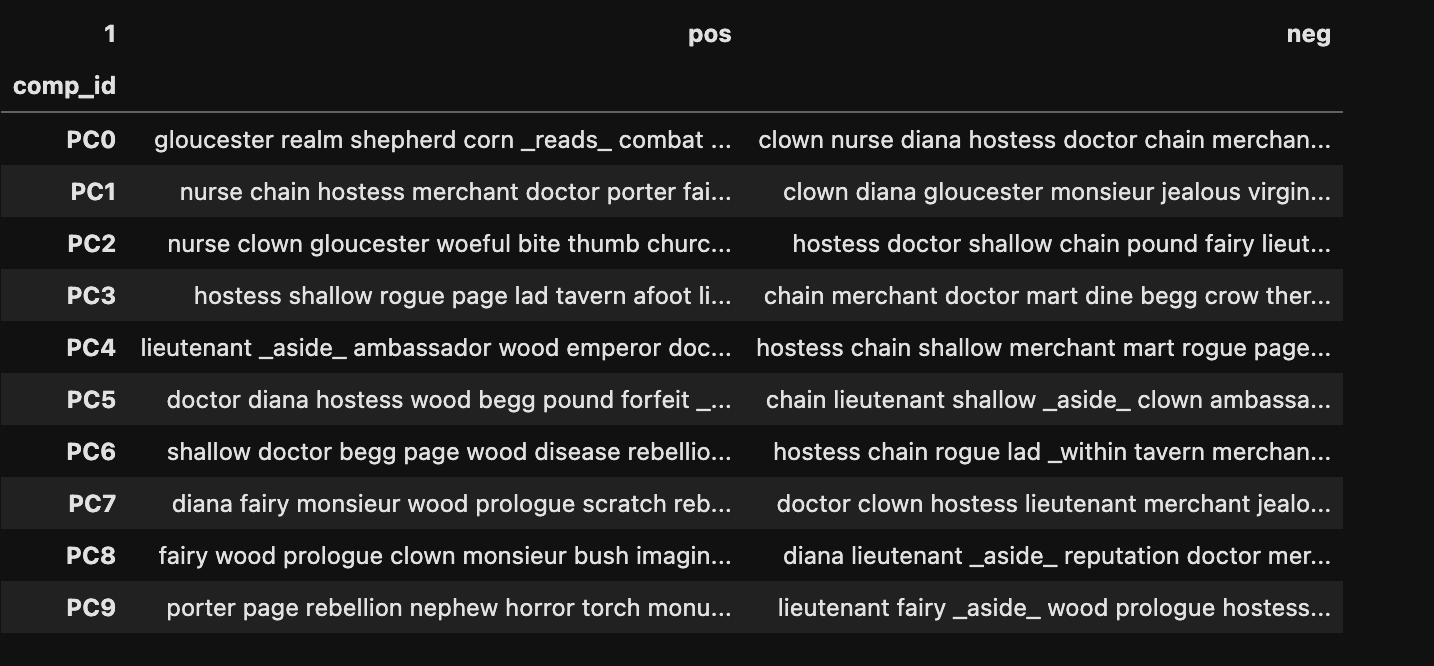

In [17]:
Image("/Users/mattmanner/Desktop/Screenshot 2023-04-06 at 2.19.04 PM.png",width=700, height=700)

The above shows 10 principal components, and a small sample of words that are positively and negatively associated with each component.

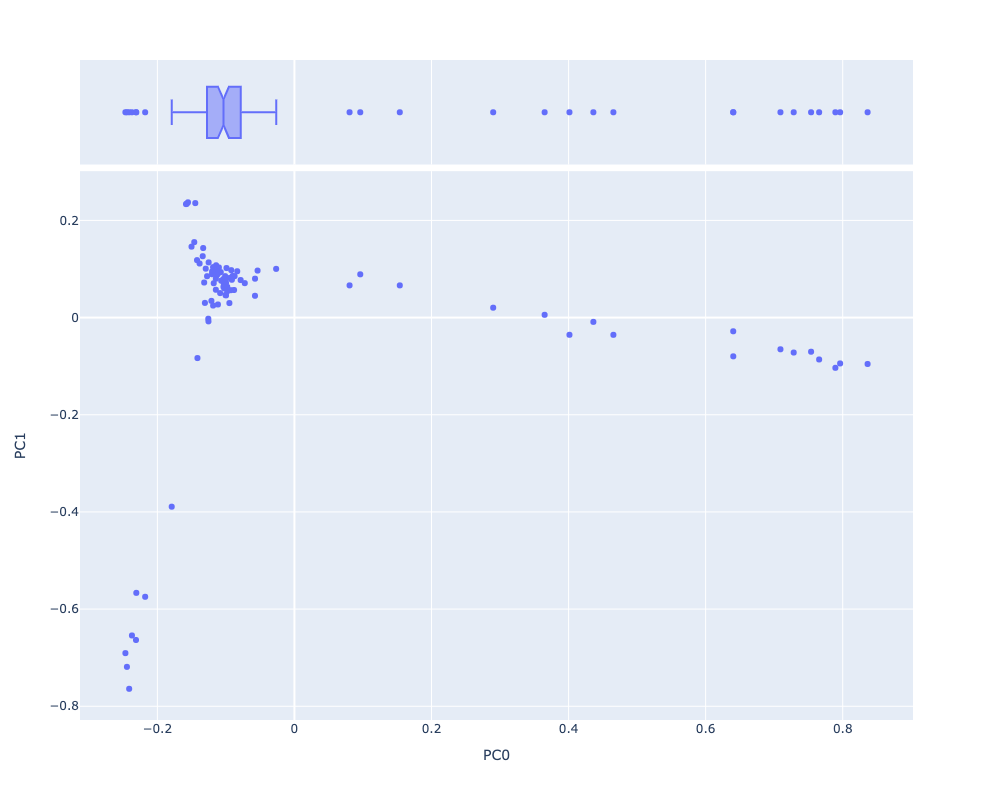

In [18]:
Image("/Users/mattmanner/Downloads/newplot.png",width=700, height=700)

The above shows Acts of each play by their relationship to each principal component. See the code file for an interactive graph with doc names available for each point on the graph.

Latent Dirichlet Allocation (LDA) is a method to generate topics and classify documents based on their relationship to these topics. LDA creates topics associated with certain words, and compares them to the documents. 

For example, Word A has a 0.15 probability of being associated with Topic X, 0.08 of being associated with Topic Y, 0.2 probability of being associated with Topic Z, etc. Word B has a 0.05 probability of being associated with Topic X, 0.3 of being associated with Topic Y, 0.1 probability of being associated with Topic Z, etc.

One can then treat each document as a bag of words and use those association probabilities to directly connect topics to documents.

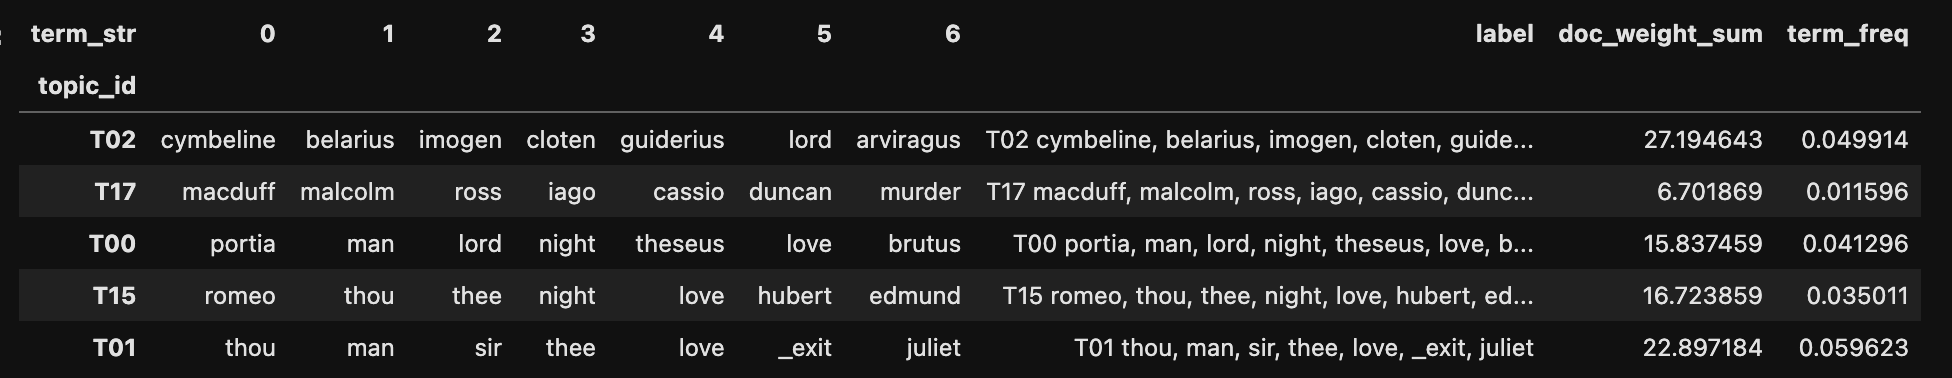

In [21]:
Image("/Users/mattmanner/Desktop/Screenshot 2023-04-10 at 10.24.13 AM.png",width=700, height=700)

The above table is a sample of 5 topics and some associated words. See Topic 17 (the second one in the table); words like Macduff, Duncan, Malcolm, murder indicate a strong association with Macbeth, while Iago and Cassio are both characters from Othello. Topic 15 has words like Romeo, love, and night. Some of the word/topic assocations are unclear, however.

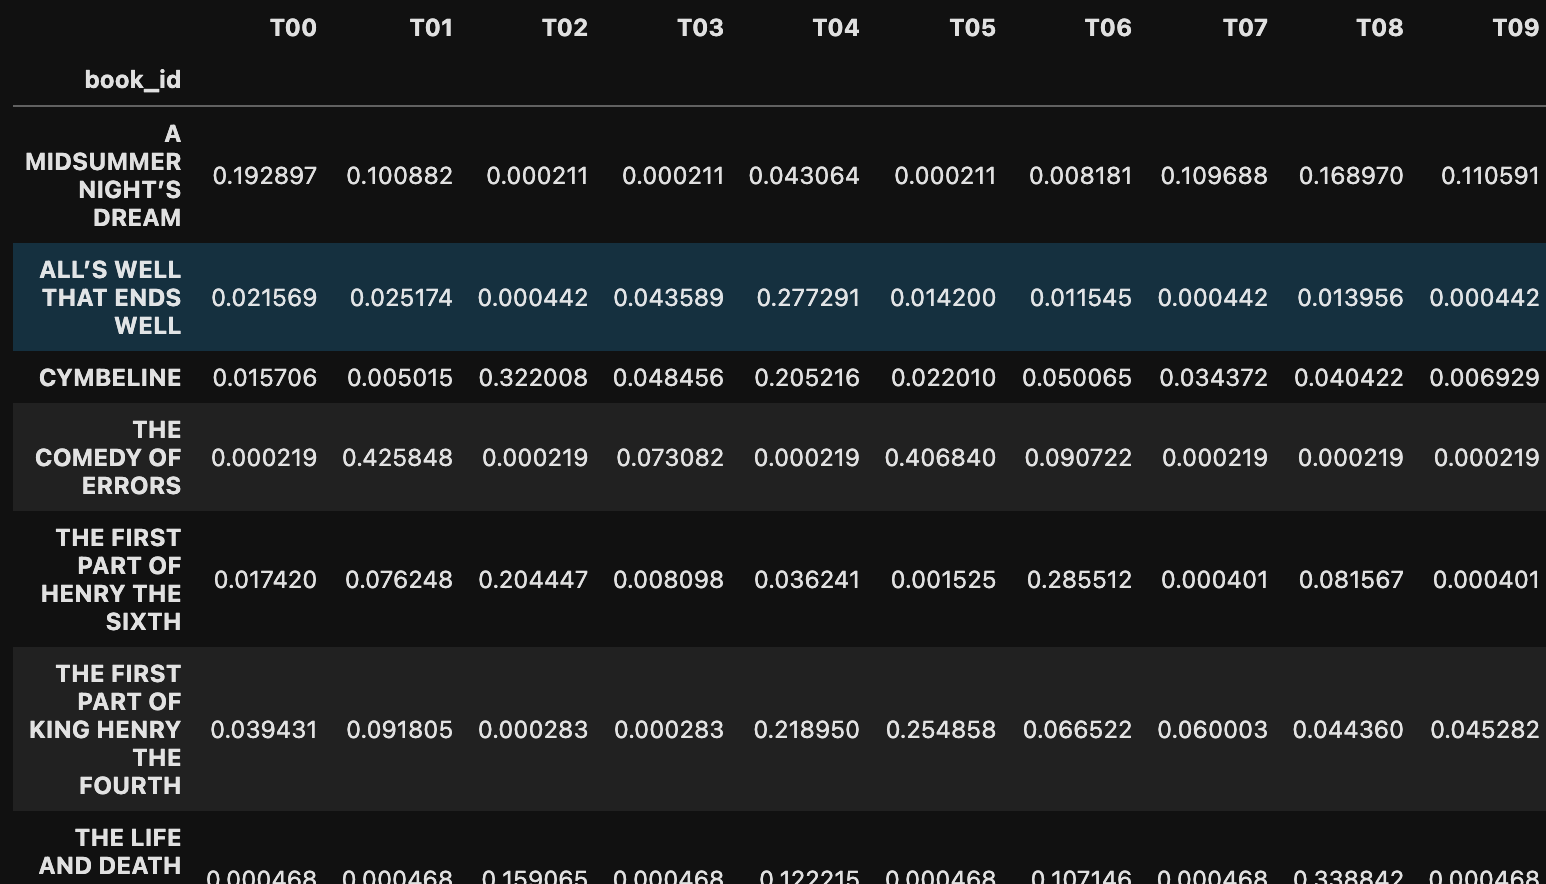

In [22]:
Image("/Users/mattmanner/Desktop/Screenshot 2023-04-10 at 10.27.48 AM.png",width=700, height=700)

The above shows a selection of Shakespeare's books and their calculated assocation with some of the topics (I generated 20 topics, which is an arbitrarily chosen hyperparameter in this case). We can see, for example, that King Henry VI, Part I, has a strong association with Topics 2 and 6. 

#### Word embeddings

Word embedding is a technique that allows similar words to occupy nearby locations in a vector space. It converts text into distributed numerical representations, where text context is used to determine locations of words in the distribution. Semantically similar (e.g. 'man' and 'woman' are opposites but they are highly related, obviously) words occupy similar places.

The tool of choice for creating word embeddings was Word2Vec. Although Word2Vec is an unsupervised model, meaning it creates the word -> vector mapping without labeled data, it runs a supervised model in the background with triplets of words in each sentence. The model attempts to predict the middle word in the triplet. For example, in the sentence "the quick brown fox jumps over the lazy dog", Word2Vec would be using {([the brown], quick), ([quick fox], brown), ([brown jumps], fox), ...} as a 'labeled' dataset.

The following plot shows an example embedding for nouns and verbs in a 2-dimensional space.

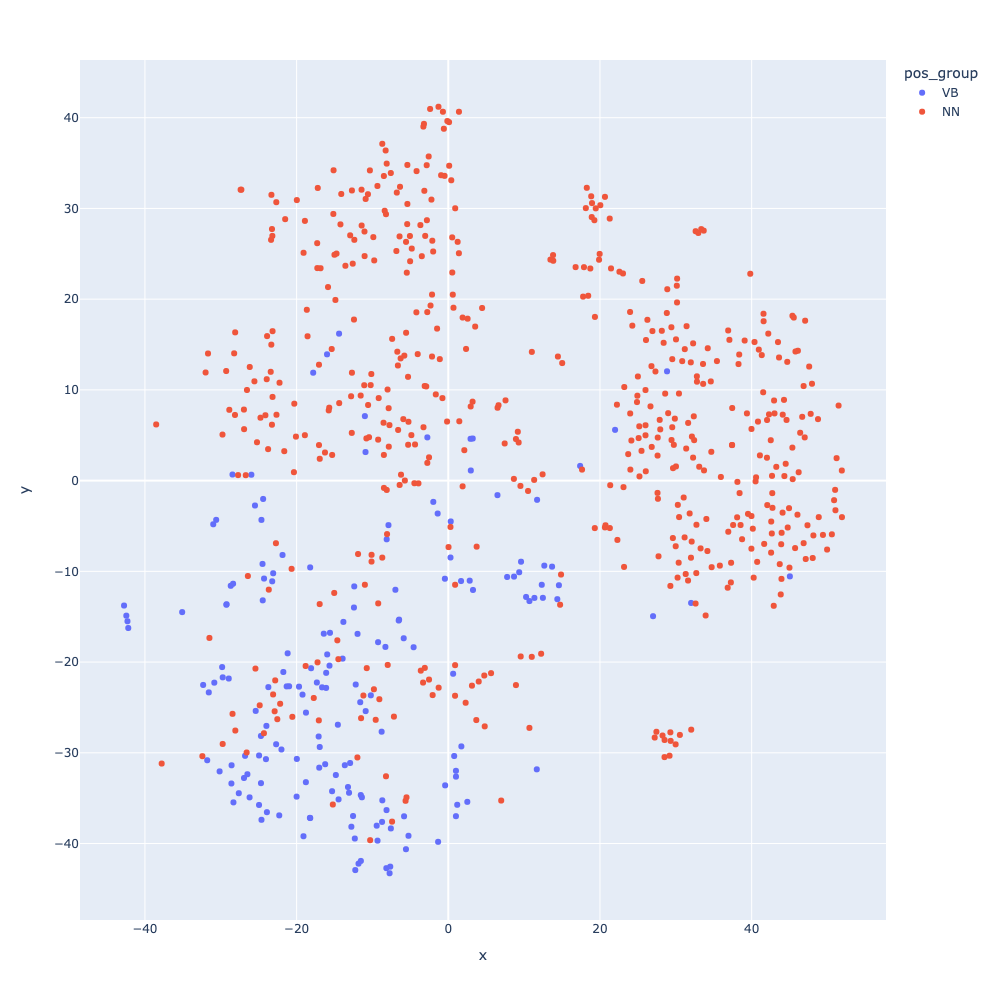

In [23]:
Image("/Users/mattmanner/Downloads/newplot (1).png",width=700, height=700)

Each dot represents a word; the code notebook has an interactive version which will allow for the word to appear when hovering the mouse over its associated point on the plot. 

The Word2Vec-generated model can also be used to find semantically similar tokens from the text. With a simple Python function to find analogies, one can see how well the vector mapping works. For example, inputting "Romeo is to Juliet as Othello is to:" gives a top result of Desdemona. As Juliet is Romeo's lover, and Desdemona is Othello's wife, this is a correct analogy.

The analogies tool can even be used on associations that may be initially unclear even to humans. For example, "Macbeth is to Macbeth as Othello is to:" yields a result of Iago. In the play Macbeth, Macbeth himself is the villain of the story, while Iago is the villain in Othello's story. This is very interesting.

#### Sentiment Analysis

Sentiment analysis is a technique that allows us to determine emotions or sentiment in a text; thousands of words have been sorted by their relevance to several emotions like anger, disgust, joy, or trust, and we can use analytical tools to extract the prevalence of these emotions from our text. 

Many words are emotionless (different than being neutral in emotion)- words like "the" or "a" typically do not have any emotion encoded into them. By focusing on words that do have emotional connotation (obvious ones include "happy" or "sad", but words like "allergic", "bored", or "hungry" also have emotional meaning), we can score sentences and therefore documents by their emotional score.

This is somewhat difficult with Shakespeare's plays, as his word usage is vastly different from our everyday vocabulary in 2023 (see the infamous "wherefore art thou, Romeo" statement from Romeo and Juliet. Generations of schoolchildren have misinterpreted the word "wherefore" as being equivalent to the word "where", while it is more analogous to "why"). However, many insights can still be gleaned from sentiment analysis of Shakespeare's works.

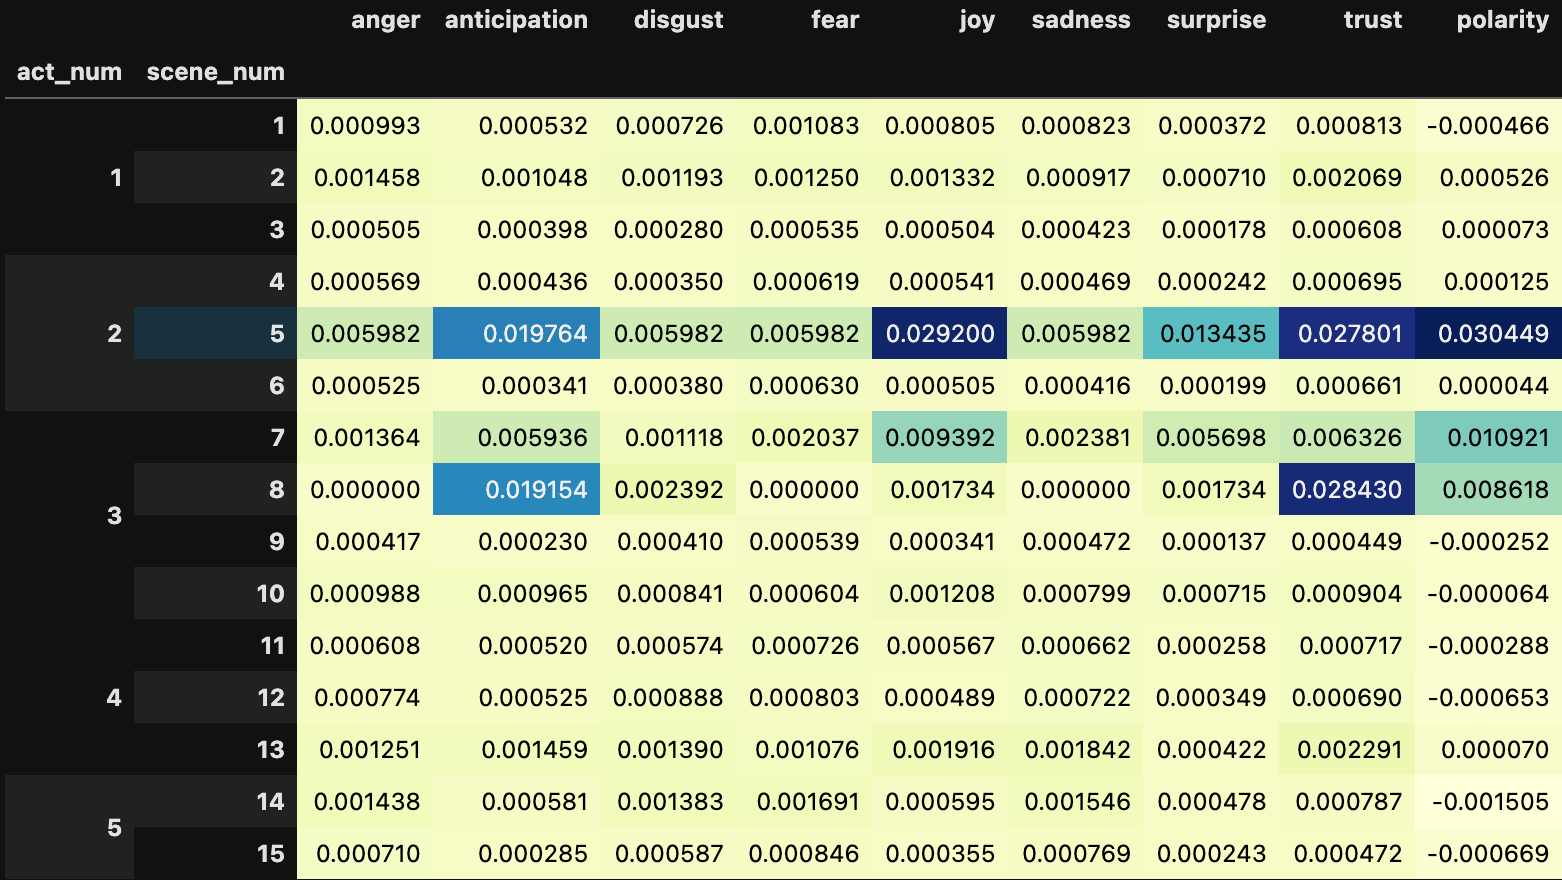

In [24]:
Image("/Users/mattmanner/Desktop/Screenshot 2023-04-10 at 11.07.40 AM.png",width=700, height=700)

The above matrix shows emotional scores for each scene of Othello. In the code notebook, I also generated the same for Macbeth and Romeo and Juliet.

Scene 5 (also stylized as Act 2 Scene 2) is a highly triumphant part of the book- it is where Othello announces defeat of the Turkish naval fleet, marking the war victory. The scene scores highly in joy, anticipation, surprise, trust, and polarity. Scene 8 (Act 3 scene 2) involves Othello giving letters to Iago (the story's villain), indicating his trust in his partner. This also ranks highly in anticipation, as the reader speculates as to what will happen next.

Interestingly, none of the scenes rated particularly highly in sadness; in general, negative emotions in the text were more rare than positive ones, despite the play's tragic nature. This was common across all the plays I performed sentiment analysis on, and I believe it may be related to both the play's structure as nearly entirely dialogue (there is almost no 3rd person narration), and the uncommon nature (by modern standards) of many of Shakespeare's words, particularly those used to express dismay or grief. 